# Data Augmentation

## Importing libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
import sys, os, distutils.core

## Load Dataset

In [2]:
# extract files
#!unzip -d 'path/to/your/target_directory'    '../../path/to/source/directory'

!unzip -d '../data/raw_data'    '../data/raw_data/unaugmented_dataset.zip'

Archive:  ../data/raw_data/unaugmented_dataset.zip
   creating: ../data/raw_data/unaugmented_data/
   creating: ../data/raw_data/unaugmented_data/cut-shot/
  inflating: ../data/raw_data/unaugmented_data/cut-shot/1.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/10.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/100.jpg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/101.jpg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/102.jpg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/11.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/12.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/13.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/14.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/16.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/17.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-shot/18.jpeg  
  inflating: ../data/raw_data/unaugmented_data/cut-sh

In [3]:
# specify path for unaugmented image and already clean augmented image
path='../data/raw_data/unaugmented_data/'

# list down the folders 
folders = os.listdir(path)

print(f'Shots in Unaugmented  Dataset : {folders}')

Shots in Unaugmented  Dataset : ['cut-shot']


## Create Lists of Unaugmented Image

In [4]:
images  = []
labels  = []

for folder in folders:
    names=os.listdir(path+folder)
    for name in names:
        img=cv2.imread(path+folder+'/'+name)
     
        # Check if the image loaded successfully
        if img is not None:
            rows, cols, _ = img.shape
        else:
            print("Failed to load the image.")
        
        # append image and lables to list
        images.append(img)       
        labels.append(folder)

# number of unaug_images
print(len(images))

262


## Flipping The Images

In [5]:
# Initialize lists to store augmented images and labels
aug_images = []
aug_labels = []

# Loop through each image in the data
for idx in range(len(images)):
    # Fetch an image and its corresponding label
    img = images[idx]
    lab = labels[idx]

    # Flip the image horizontally (1 indicates horizontal flip)
    img_flip = cv2.flip(img, 1)

    # Append the augmented image and lablesto the list
    aug_images.append(img_flip)
    aug_labels.append(lab)

## Display Actual and Augmented Image For Sample Images

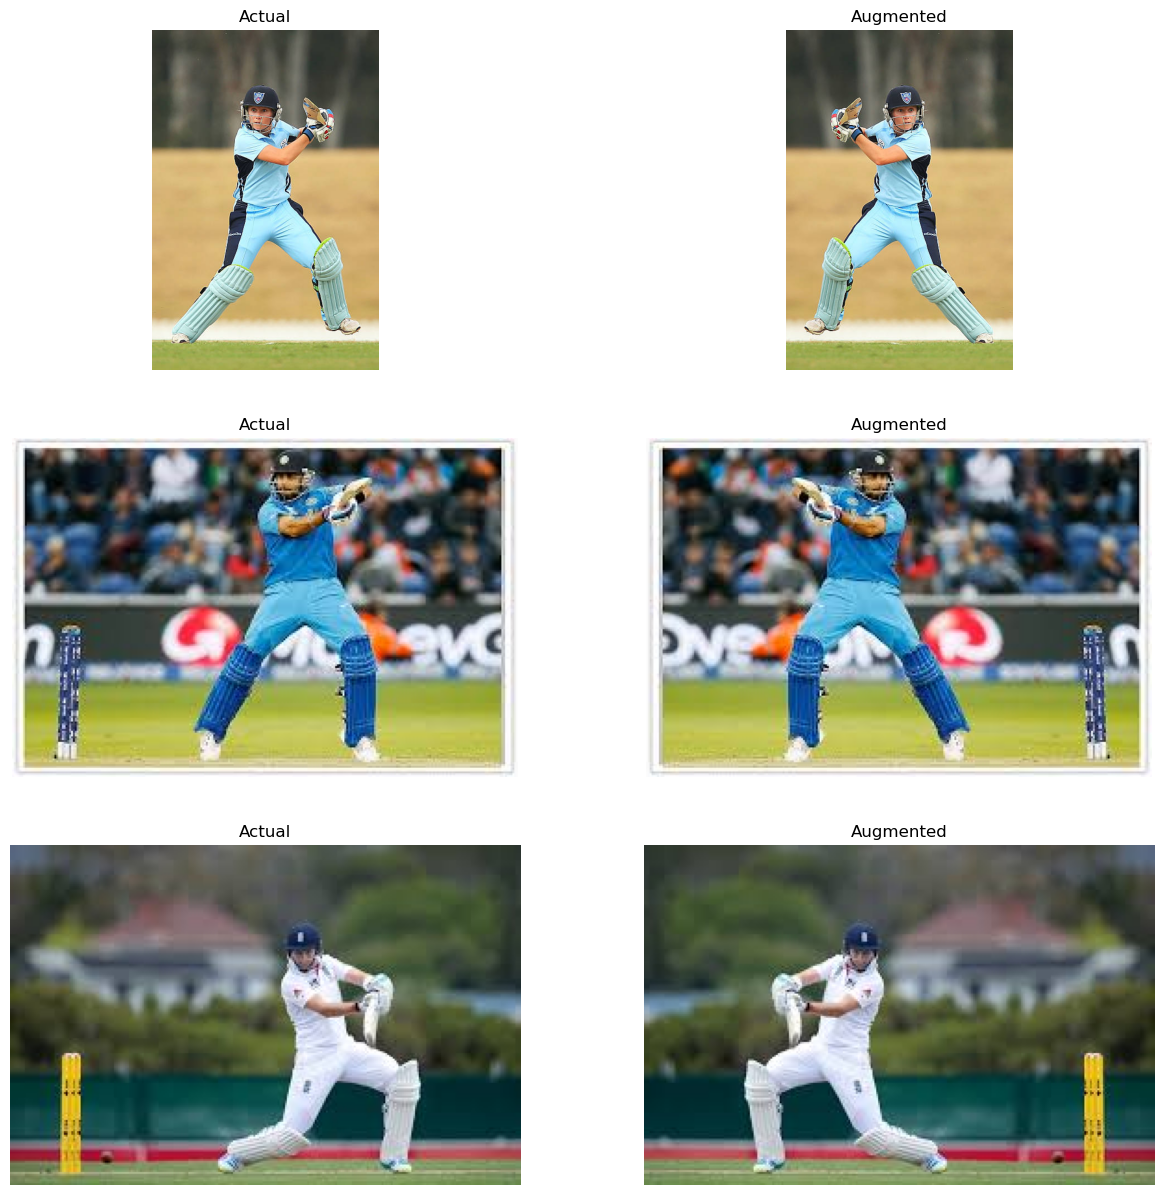

In [6]:
# create subplots with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

# randomly sample indices
ind = random.sample(range(len(aug_images)), 3)

for row in range(3):
  for col in range(2):    
    
    # first column for actual image
    if col==0:      
      # display actual image
      img1 = cv2.cvtColor(images[ ind[row] ], cv2.COLOR_BGR2RGB)
      ax[row, col].imshow(img1 )
      # set title
      ax[row, col].set_title('Actual')
      ax[row, col].axis('off')
    
    # second column for augmented image
    else:
      # display augmented image  
      img2 = cv2.cvtColor(aug_images[ ind[row] ], cv2.COLOR_BGR2RGB)
      ax[row, col].imshow(img2 )
      # set title
      ax[row, col].set_title('Augmented')
      ax[row, col].axis('off')


## Combine Actual and Augmented Images and Labels

In [7]:
images = images + aug_images
labels = labels + aug_labels

# total number of images
print(f'Total images : {len(images)}')

Total images : 524


## Some Other Augmentation Techniques Like Rotation of Image

In [8]:
# Initialize lists to store augmented images and labels
aug_images = []
aug_labels = []

# Loop through each image in the data
for idx in range(len(images)):
    # Fetch an image and its corresponding label
    img = images[idx]
    lab = labels[idx]
    
    # Apply slight rotation (between -5 and 5 degrees)
    angle = random.randint(-10, 10)
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    img_rotated = cv2.warpAffine(img, M, (cols, rows))

    # Append the augmented image and lables to the list
    aug_images.append(img_rotated)
    aug_labels.append(lab)

## Visualization 

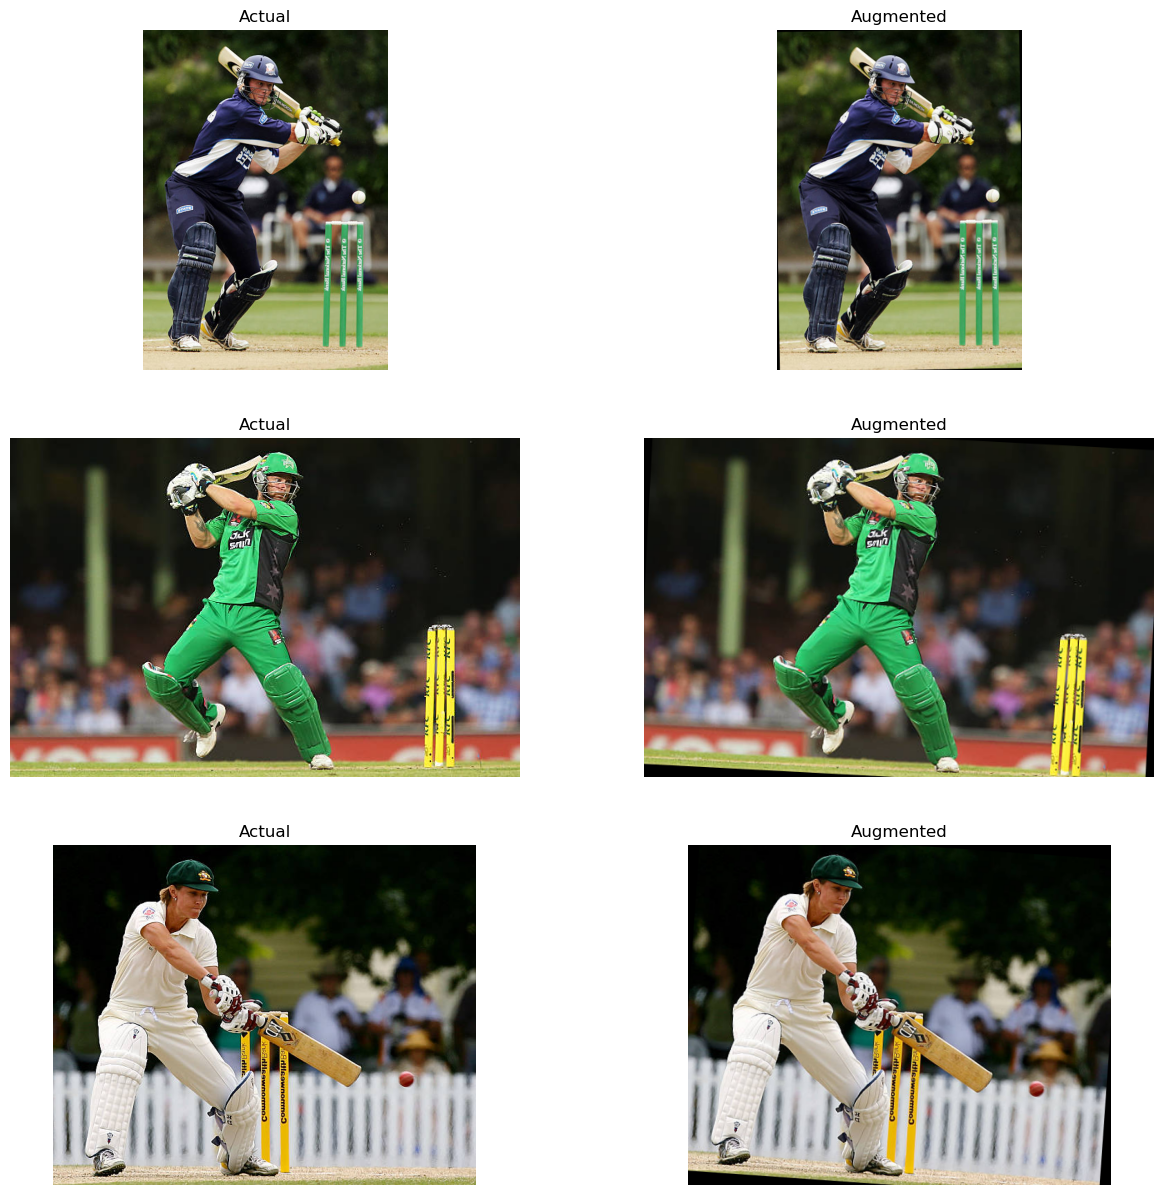

In [9]:
# create subplots with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

# randomly sample indices
ind = random.sample(range(len(aug_images)), 3)

for row in range(3):
  for col in range(2):    
    
    # first column for actual image
    if col==0:      
      # display actual image
      img1 = cv2.cvtColor(images[ ind[row] ], cv2.COLOR_BGR2RGB)
      ax[row, col].imshow(img1 )
      # set title
      ax[row, col].set_title('Actual')
      ax[row, col].axis('off')
    
    # second column for augmented image
    else:
      # display augmented image  
      img2 = cv2.cvtColor(aug_images[ ind[row] ], cv2.COLOR_BGR2RGB)
      ax[row, col].imshow(img2 )
      # set title
      ax[row, col].set_title('Augmented')
      ax[row, col].axis('off')


## Combine Actual and Augmented Images and Labels

In [10]:
images = images + aug_images
labels = labels + aug_labels

# total number of images
print(f'Total images : {len(images)}')

Total images : 1048


## Showing Some Images From Dataset

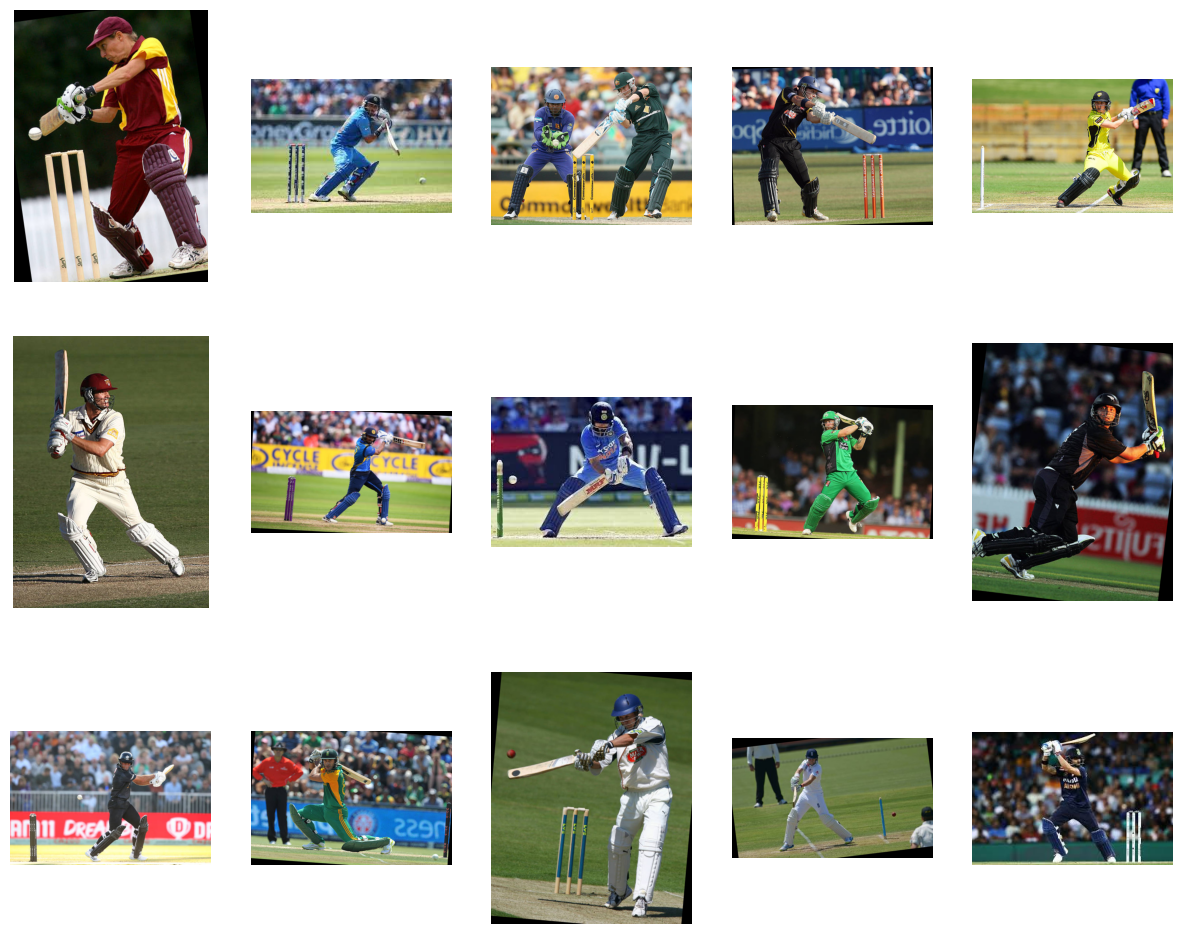

In [11]:
# create subplots with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,12))

# randomly sample indices
ind = random.sample(range(len(images)), 15)

for row in range(3):
  for col in range(5): 
      img_idx = 5 * row + col  # Calculate the index for the ind list
      img = cv2.cvtColor(images[ ind[img_idx] ], cv2.COLOR_BGR2RGB)
      ax[row, col].imshow(img)
      # set title
      #ax[row, col].set_title(labels[ ind[img_idx] ])
      # Turn off axis
      ax[row, col].axis('off')

## Save Images in a Directory 

In [12]:
# Define a directory where you want to save the augmented images with their original images
save_directory = "../data/processed_data/cleaned_images"

# Create the save directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Loop through each image and save it
for idx in range(len(images)):
    img = images[idx]
    lab = labels[idx]

    # Define a filename for the saved image (you can use the label to create unique filenames)
    filename = f"{lab}_{idx}.jpg"

    # Define the complete path for saving the image
    save_path = os.path.join(save_directory, filename)

    # Save the image using OpenCV
    cv2.imwrite(save_path, img)

# All augmented images and original images have been saved in the specified directory
print(f'Images saved in : {save_directory}')

Images saved in : ../data/processed_data/cleaned_images
